<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Final_Modelling_and_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Necesary importings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

#Machine learning utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
X_train_smote=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_train_smote_csv.csv')
y_train_smote=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_train_smote_csv.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_train.csv')
X_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_train.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_test.csv')
X_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_test.csv')

These are the results of the first modeling

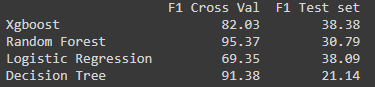

## Model tuning

For this model I will try an approach with ensemble of Logistic Regression and XGBoost Classifier.

First, I am going to tune those models to improve performance.

In [6]:
#Instantiate the models

logreg=LogisticRegression(random_state=123)
xgbc=XGBClassifier(random_state=123)

In [7]:
#Exploring model paramters

print(logreg.get_params())
print('\n',xgbc.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

 {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 123, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [9]:
#Tuning XGBoost Classifier

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[1]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[2]	validation_0-auc:0.812037	validation_0-error:0.233075	validation_1-auc:0.769639	validation_1-error:0.132798
[3]	validation_0-auc:0.812296	validation_0-error:0.233075	validation_1-auc:0.770337	validation_1-error:0.132798
[4]	validation_0-auc:0.830192	validation_0-error:0.23469	validation_1-auc:0.77415	validation_1-error:0.113225
[5]	validation_0-auc:0.835033	validation_0-error:0.23469	validation_1-auc:0.771245	validation_1-error:0.113225
[6]	validation_0-auc:0.83584	validation_0-error:0.219178	validation_1-auc:0.772397	validation_1-error:0.121823
[7]	validation_0-auc:0.84616	validation_0-error:0.23189	validation_1-auc:0.776544	validation_1-error:0.113449
[8]	validation_0-auc:0.846992	validation_0-error:0.219039	validation_1-auc:0.776507	validation_1-error:0.12138

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[1]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[2]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[3]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[4]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[5]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[6]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[7]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0.132798
[8]	validation_0-auc:0.808366	validation_0-error:0.233075	validation_1-auc:0.767491	validation_1-error:0

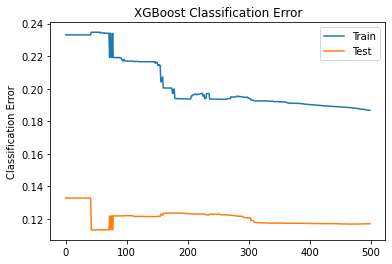

In [25]:
params={'random_state':[123],'n_estimators':600,'learning_rate':0.001,'early_stopping_rounds':10}

xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.841113	validation_0-error:0.212372	validation_1-auc:0.773117	validation_1-error:0.131633
[1]	validation_0-auc:0.841383	validation_0-error:0.212247	validation_1-auc:0.773294	validation_1-error:0.131261
[2]	validation_0-auc:0.841765	validation_0-error:0.212247	validation_1-auc:0.773797	validation_1-error:0.131261
[3]	validation_0-auc:0.855041	validation_0-error:0.199853	validation_1-auc:0.771479	validation_1-error:0.131638
[4]	validation_0-auc:0.860275	validation_0-error:0.196145	validation_1-auc:0.776231	validation_1-error:0.114833
[5]	validation_0-auc:0.861656	validation_0-error:0.185975	validation_1-auc:0.776268	validation_1-error:0.114965
[6]	validation_0-auc:0.866615	validation_0-error:0.184838	validation_1-auc:0.778708	validation_1-error:0.115143
[7]	validation_0-auc:0.86845	validation_0-error:0.183679	validation_1-auc:0.777992	validation_1-error:0.11495
[8]	validation_0-auc:0.868988	validation_0-error:0.186341	validation_1-auc:0.779431	validation_1-error:0.1

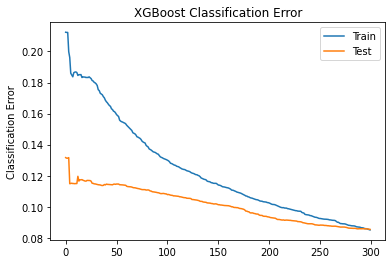

In [26]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.841113	validation_0-error:0.212372	validation_1-auc:0.773117	validation_1-error:0.131633
[1]	validation_0-auc:0.841323	validation_0-error:0.212247	validation_1-auc:0.773254	validation_1-error:0.131261
[2]	validation_0-auc:0.841359	validation_0-error:0.212335	validation_1-auc:0.773202	validation_1-error:0.131261
[3]	validation_0-auc:0.841305	validation_0-error:0.212247	validation_1-auc:0.773303	validation_1-error:0.131261
[4]	validation_0-auc:0.841338	validation_0-error:0.212247	validation_1-auc:0.773324	validation_1-error:0.131261
[5]	validation_0-auc:0.841424	validation_0-error:0.212247	validation_1-auc:0.773324	validation_1-error:0.131261
[6]	validation_0-auc:0.841423	validation_0-error:0.212246	validation_1-auc:0.773355	validation_1-error:0.131261
[7]	validation_0-auc:0.841422	validation_0-error:0.212246	validation_1-auc:0.773359	validation_1-error:0.131261
[8]	validation_0-auc:0.84143	validation_0-error:0.212246	validation_1-auc:0.773336	validation_1-error:0.

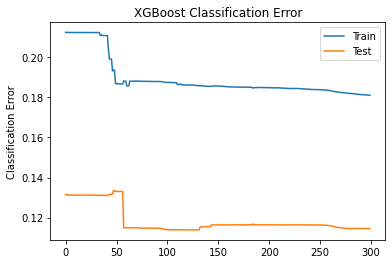

In [27]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [5]:
X_train_smote.drop(['plan_list_price','total_secs'],axis=1,inplace=True)
X_train.drop(['plan_list_price','total_secs'],axis=1,inplace=True)
X_test.drop(['plan_list_price','total_secs'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.870429	validation_0-error:0.181942	validation_1-auc:0.77083	validation_1-error:0.131775
[1]	validation_0-auc:0.870577	validation_0-error:0.181771	validation_1-auc:0.772007	validation_1-error:0.132543
[2]	validation_0-auc:0.870634	validation_0-error:0.181927	validation_1-auc:0.772785	validation_1-error:0.130549
[3]	validation_0-auc:0.870714	validation_0-error:0.181959	validation_1-auc:0.772947	validation_1-error:0.130813
[4]	validation_0-auc:0.870735	validation_0-error:0.181657	validation_1-auc:0.772941	validation_1-error:0.131531
[5]	validation_0-auc:0.870864	validation_0-error:0.181699	validation_1-auc:0.772904	validation_1-error:0.130691
[6]	validation_0-auc:0.87086	validation_0-error:0.181497	validation_1-auc:0.773038	validation_1-error:0.130274
[7]	validation_0-auc:0.870938	validation_0-error:0.18147	validation_1-auc:0.772985	validation_1-error:0.132365
[8]	validation_0-auc:0.870994	validation_0-error:0.181419	validation_1-auc:0.773009	validation_1-error:0.13

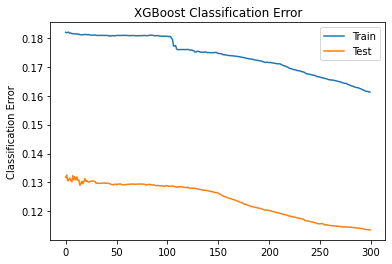

In [6]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.776475	validation_0-error:0.294057	validation_1-auc:0.711339	validation_1-error:0.161895
[1]	validation_0-auc:0.817197	validation_0-error:0.2286	validation_1-auc:0.768013	validation_1-error:0.134456
[2]	validation_0-auc:0.823801	validation_0-error:0.216646	validation_1-auc:0.76854	validation_1-error:0.117575
[3]	validation_0-auc:0.825422	validation_0-error:0.228813	validation_1-auc:0.771813	validation_1-error:0.110391
[4]	validation_0-auc:0.838546	validation_0-error:0.232541	validation_1-auc:0.77883	validation_1-error:0.109618
[5]	validation_0-auc:0.839222	validation_0-error:0.229625	validation_1-auc:0.780608	validation_1-error:0.109501
[6]	validation_0-auc:0.844707	validation_0-error:0.222041	validation_1-auc:0.785085	validation_1-error:0.109887
[7]	validation_0-auc:0.838919	validation_0-error:0.225302	validation_1-auc:0.781802	validation_1-error:0.109623
[8]	validation_0-auc:0.835091	validation_0-error:0.222595	validation_1-auc:0.780054	validation_1-error:0.111

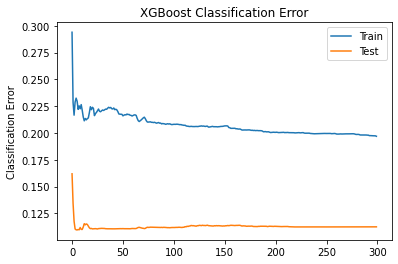

In [8]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.7, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.771616	validation_0-error:0.297467	validation_1-auc:0.688246	validation_1-error:0.143859
[1]	validation_0-auc:0.825384	validation_0-error:0.224718	validation_1-auc:0.774074	validation_1-error:0.123553
[2]	validation_0-auc:0.826694	validation_0-error:0.21943	validation_1-auc:0.777403	validation_1-error:0.117341
[3]	validation_0-auc:0.835813	validation_0-error:0.224866	validation_1-auc:0.777554	validation_1-error:0.110645
[4]	validation_0-auc:0.836961	validation_0-error:0.216148	validation_1-auc:0.774983	validation_1-error:0.117682
[5]	validation_0-auc:0.840823	validation_0-error:0.222251	validation_1-auc:0.772335	validation_1-error:0.114247
[6]	validation_0-auc:0.851247	validation_0-error:0.230652	validation_1-auc:0.778213	validation_1-error:0.109516
[7]	validation_0-auc:0.84617	validation_0-error:0.22395	validation_1-auc:0.779377	validation_1-error:0.110427
[8]	validation_0-auc:0.842267	validation_0-error:0.219455	validation_1-auc:0.776794	validation_1-error:0.11

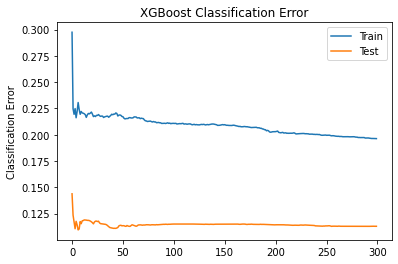

In [9]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.769601	validation_0-error:0.279864	validation_1-auc:0.670662	validation_1-error:0.10163
[1]	validation_0-auc:0.832583	validation_0-error:0.21309	validation_1-auc:0.769428	validation_1-error:0.135276
[2]	validation_0-auc:0.826604	validation_0-error:0.204286	validation_1-auc:0.767159	validation_1-error:0.11322
[3]	validation_0-auc:0.827588	validation_0-error:0.222184	validation_1-auc:0.767727	validation_1-error:0.111765
[4]	validation_0-auc:0.840638	validation_0-error:0.229372	validation_1-auc:0.767577	validation_1-error:0.111495
[5]	validation_0-auc:0.842646	validation_0-error:0.228539	validation_1-auc:0.773128	validation_1-error:0.110854
[6]	validation_0-auc:0.850544	validation_0-error:0.229405	validation_1-auc:0.777647	validation_1-error:0.110844
[7]	validation_0-auc:0.850313	validation_0-error:0.22946	validation_1-auc:0.779502	validation_1-error:0.111658
[8]	validation_0-auc:0.848405	validation_0-error:0.216269	validation_1-auc:0.783963	validation_1-error:0.113

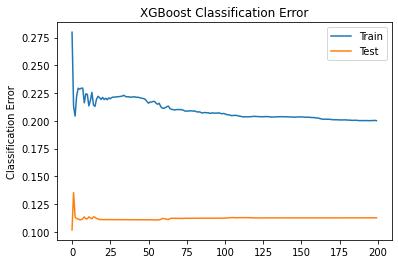

In [10]:
xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.75, colsample_bytree=0.75, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=0)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgbc.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set)

results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
y_pred=xgbc.predict(X_test)


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))




# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [11]:
#Final XGBoost

xgbc_final=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.75, colsample_bytree=0.75, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=0)



In [ ]:
rf=RandomForestClassifier(random_state=123)

# Define the dictionary 'params_rf'

params_rf = {'n_estimators':[100,350,500],'max_features':['log2','auto','sqrt'],'min_samples_leaf':[2,10,30]}

# Instantiate grid_rf

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='f1',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

#Training

grid_rf.fit(X_train_smote,y_train_smote)

#Extractib best model from Grid

rf_final=grid_rf.best_estimator_

#Predictions

y_pred=rf_final.predict(X_test)
y_pred_proba = rf_final.predict_proba(X_test)[:,1]

#Metrics


print('\nScores')
print('------------------------')
print('\nAUC:',np.round(roc_auc_score(y_test,y_pred_proba)*100,2),'%')
print('Accuracy:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Precision:',np.round(precision_score(y_test,y_pred)*100,2),'%')
print('Recall:',np.round(recall_score(y_test,y_pred)*100,2),'%')
print('F1 score:',np.round(f1_score(y_test,y_pred)*100,2))





Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
